<a href="https://colab.research.google.com/github/jcjimenezb123/PFM_PronosticoDemanda/blob/master/RecontruccionVta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

In [21]:
#se carga el excel con los datos de venta por dia por talla
df_vta=pd.read_excel('Book1.xlsx',
                 sheet_name='Sheet1', 
                 parse_dates=['fecha'],
                 index_col = None, skiprows= 33, nrows= 31, 
                 usecols=range(0,10),
                 engine="openpyxl")
df_vta.info(memory_usage='deep')

#se carga el excel con los datos de venta por dia por talla
df_exi=pd.read_excel('Book1.xlsx',
                 sheet_name='Sheet1', 
                 parse_dates=['Efecha'],
                 index_col = None, skiprows= 67, nrows= 31, 
                 usecols=range(0,10),
                 engine="openpyxl")
df_exi.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   fecha   31 non-null     datetime64[ns]
 1   Ta22    31 non-null     int64         
 2   Ta22.5  31 non-null     int64         
 3   Ta23    31 non-null     int64         
 4   Ta23.5  31 non-null     int64         
 5   Ta24    31 non-null     int64         
 6   Ta24.5  31 non-null     int64         
 7   Ta25    31 non-null     int64         
 8   Ta25.5  31 non-null     int64         
 9   Ta26    31 non-null     int64         
dtypes: datetime64[ns](1), int64(9)
memory usage: 2.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Efecha   31 non-null     datetime64[ns]
 1   ETa22    31 non-null     int64         
 2   ETa22.5  31 non-null    

In [10]:
df_vta.head()

,fecha,Ta22,Ta22.5,Ta23,Ta23.5,Ta24,Ta24.5,Ta25,Ta25.5,Ta26
0,2022-01-01,2,2,0,3,6,3,2,0,2
1,2022-01-02,0,3,1,1,1,5,1,2,0
2,2022-01-03,0,0,3,0,5,2,3,1,0
3,2022-01-04,0,1,2,3,1,2,0,3,0
4,2022-01-05,0,0,5,4,6,1,2,0,1


In [11]:
df_exi.head()

,fecha,ETa22,ETa22.5,ETa23,ETa23.5,ETa24,ETa24.5,ETa25,ETa25.5,ETa26
0,2022-01-01,9,2,1,1,2,-1,3,3,-2
1,2022-01-02,0,-1,1,3,5,0,2,-1,2
2,2022-01-03,2,-2,3,-1,5,1,5,-1,4
3,2022-01-04,1,-1,0,3,4,5,2,-1,5
4,2022-01-05,5,-2,4,5,0,-2,5,4,2


In [22]:
df= pd.concat([df_vta, df_exi], axis=1)
df

,fecha,Ta22,Ta22.5,Ta23,Ta23.5,Ta24,Ta24.5,Ta25,Ta25.5,Ta26,Efecha,ETa22,ETa22.5,ETa23,ETa23.5,ETa24,ETa24.5,ETa25,ETa25.5,ETa26
0,2022-01-01,2,2,0,3,6,3,2,0,2,2022-01-01,9,2,1,1,2,-1,3,3,-2
1,2022-01-02,0,3,1,1,1,5,1,2,0,2022-01-02,0,-1,1,3,5,0,2,-1,2
2,2022-01-03,0,0,3,0,5,2,3,1,0,2022-01-03,2,-2,3,-1,5,1,5,-1,4
3,2022-01-04,0,1,2,3,1,2,0,3,0,2022-01-04,1,-1,0,3,4,5,2,-1,5
4,2022-01-05,0,0,5,4,6,1,2,0,1,2022-01-05,5,-2,4,5,0,-2,5,4,2
5,2022-01-06,0,1,4,0,5,4,3,3,1,2022-01-06,1,2,4,2,3,1,5,4,-1
6,2022-01-07,4,0,2,4,6,5,1,1,0,2022-01-07,4,4,0,-2,-1,5,-2,-1,3
7,2022-01-08,4,1,4,0,4,2,0,3,1,2022-01-08,0,4,3,4,2,-1,3,1,-1
8,2022-01-09,0,2,0,1,0,5,0,2,2,2022-01-09,5,-2,4,3,1,2,1,-2,1
9,2022-01-10,0,3,1,3,2,0,2,0,1,2022-01-10,5,1,3,-2,0,-2,2,1,4


In [23]:
#Se cuentan los negados
for col in df.columns[11:]:
    print(col,len(df[df[col]<=0]))

ETa22 2
ETa22.5 10
ETa23 13
ETa23.5 13
ETa24 10
ETa24.5 17
ETa25 7
ETa25.5 10
ETa26 12


In [24]:
#los negados se ponen a null para ser estimados
for col in df.columns[1:10]:
  df[col]=df.apply(lambda x: np.NAN if x['E'+col] <= 0 else x[col],axis=1)

df.head(10)

,fecha,Ta22,Ta22.5,Ta23,Ta23.5,Ta24,Ta24.5,Ta25,Ta25.5,Ta26,Efecha,ETa22,ETa22.5,ETa23,ETa23.5,ETa24,ETa24.5,ETa25,ETa25.5,ETa26
0,2022-01-01,2.0,2.0,0.0,3.0,6.0,NaN,2.0,0.0,NaN,2022-01-01,9,2,1,1,2,-1,3,3,-2
1,2022-01-02,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,0.0,2022-01-02,0,-1,1,3,5,0,2,-1,2
2,2022-01-03,0.0,NaN,3.0,NaN,5.0,2.0,3.0,NaN,0.0,2022-01-03,2,-2,3,-1,5,1,5,-1,4
3,2022-01-04,0.0,NaN,NaN,3.0,1.0,2.0,0.0,NaN,0.0,2022-01-04,1,-1,0,3,4,5,2,-1,5
4,2022-01-05,0.0,NaN,5.0,4.0,NaN,NaN,2.0,0.0,1.0,2022-01-05,5,-2,4,5,0,-2,5,4,2
5,2022-01-06,0.0,1.0,4.0,0.0,5.0,4.0,3.0,3.0,NaN,2022-01-06,1,2,4,2,3,1,5,4,-1
6,2022-01-07,4.0,0.0,NaN,NaN,NaN,5.0,NaN,NaN,0.0,2022-01-07,4,4,0,-2,-1,5,-2,-1,3
7,2022-01-08,NaN,1.0,4.0,0.0,4.0,NaN,0.0,3.0,NaN,2022-01-08,0,4,3,4,2,-1,3,1,-1
8,2022-01-09,0.0,NaN,0.0,1.0,0.0,5.0,0.0,NaN,2.0,2022-01-09,5,-2,4,3,1,2,1,-2,1
9,2022-01-10,0.0,3.0,1.0,NaN,NaN,NaN,2.0,0.0,1.0,2022-01-10,5,1,3,-2,0,-2,2,1,4


In [25]:
#se obtiene el dia de la semana
df['dia_semana'] = df['fecha'].dt.day_name()
df.head()

,fecha,Ta22,Ta22.5,Ta23,Ta23.5,Ta24,Ta24.5,Ta25,Ta25.5,Ta26,...,ETa22,ETa22.5,ETa23,ETa23.5,ETa24,ETa24.5,ETa25,ETa25.5,ETa26,dia_semana
0,2022-01-01,2.0,2.0,0.0,3.0,6.0,NaN,2.0,0.0,NaN,...,9,2,1,1,2,-1,3,3,-2,Saturday
1,2022-01-02,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,0.0,...,0,-1,1,3,5,0,2,-1,2,Sunday
2,2022-01-03,0.0,NaN,3.0,NaN,5.0,2.0,3.0,NaN,0.0,...,2,-2,3,-1,5,1,5,-1,4,Monday
3,2022-01-04,0.0,NaN,NaN,3.0,1.0,2.0,0.0,NaN,0.0,...,1,-1,0,3,4,5,2,-1,5,Tuesday
4,2022-01-05,0.0,NaN,5.0,4.0,NaN,NaN,2.0,0.0,1.0,...,5,-2,4,5,0,-2,5,4,2,Wednesday


In [26]:
#se odenan por dia se la semana para ser interpolados
df.sort_values(by=['dia_semana','fecha'],inplace=True)
df

,fecha,Ta22,Ta22.5,Ta23,Ta23.5,Ta24,Ta24.5,Ta25,Ta25.5,Ta26,...,ETa22,ETa22.5,ETa23,ETa23.5,ETa24,ETa24.5,ETa25,ETa25.5,ETa26,dia_semana
6,2022-01-07,4.0,0.0,NaN,NaN,NaN,5.0,NaN,NaN,0.0,...,4,4,0,-2,-1,5,-2,-1,3,Friday
13,2022-01-14,2.0,1.0,4.0,NaN,5.0,5.0,1.0,0.0,2.0,...,5,2,3,-1,4,1,2,2,2,Friday
20,2022-01-21,3.0,1.0,4.0,NaN,6.0,4.0,0.0,NaN,1.0,...,2,4,3,-1,2,1,5,-1,5,Friday
27,2022-01-28,1.0,1.0,NaN,3.0,3.0,2.0,1.0,3.0,NaN,...,1,4,-1,1,2,4,4,3,-1,Friday
2,2022-01-03,0.0,NaN,3.0,NaN,5.0,2.0,3.0,NaN,0.0,...,2,-2,3,-1,5,1,5,-1,4,Monday
9,2022-01-10,0.0,3.0,1.0,NaN,NaN,NaN,2.0,0.0,1.0,...,5,1,3,-2,0,-2,2,1,4,Monday
16,2022-01-17,1.0,1.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,...,3,3,5,4,3,-1,0,0,0,Monday
23,2022-01-24,0.0,NaN,NaN,2.0,0.0,0.0,NaN,1.0,1.0,...,2,0,-1,4,5,3,0,3,2,Monday
30,2022-01-31,2.0,3.0,1.0,NaN,NaN,NaN,0.0,1.0,NaN,...,1,5,3,0,0,-1,4,4,-1,Monday
0,2022-01-01,2.0,2.0,0.0,3.0,6.0,NaN,2.0,0.0,NaN,...,9,2,1,1,2,-1,3,3,-2,Saturday


In [28]:
df.interpolate(method='ffill', limit_direction='forward',inplace=True)
df.interpolate(method='bfill', limit_direction='backward',inplace=True)
df

,fecha,Ta22,Ta22.5,Ta23,Ta23.5,Ta24,Ta24.5,Ta25,Ta25.5,Ta26,...,ETa22,ETa22.5,ETa23,ETa23.5,ETa24,ETa24.5,ETa25,ETa25.5,ETa26,dia_semana
6,2022-01-07,4.0,0.0,4.0,3.0,5.0,5.0,1.0,0.0,0.0,...,4,4,0,-2,-1,5,-2,-1,3,Friday
13,2022-01-14,2.0,1.0,4.0,3.0,5.0,5.0,1.0,0.0,2.0,...,5,2,3,-1,4,1,2,2,2,Friday
20,2022-01-21,3.0,1.0,4.0,3.0,6.0,4.0,0.0,0.0,1.0,...,2,4,3,-1,2,1,5,-1,5,Friday
27,2022-01-28,1.0,1.0,4.0,3.0,3.0,2.0,1.0,3.0,1.0,...,1,4,-1,1,2,4,4,3,-1,Friday
2,2022-01-03,0.0,1.0,3.0,3.0,5.0,2.0,3.0,3.0,0.0,...,2,-2,3,-1,5,1,5,-1,4,Monday
9,2022-01-10,0.0,3.0,1.0,3.0,5.0,2.0,2.0,0.0,1.0,...,5,1,3,-2,0,-2,2,1,4,Monday
16,2022-01-17,1.0,1.0,2.0,2.0,1.0,2.0,2.0,0.0,1.0,...,3,3,5,4,3,-1,0,0,0,Monday
23,2022-01-24,0.0,1.0,2.0,2.0,0.0,0.0,2.0,1.0,1.0,...,2,0,-1,4,5,3,0,3,2,Monday
30,2022-01-31,2.0,3.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,...,1,5,3,0,0,-1,4,4,-1,Monday
0,2022-01-01,2.0,2.0,0.0,3.0,6.0,0.0,2.0,0.0,1.0,...,9,2,1,1,2,-1,3,3,-2,Saturday


In [29]:
df.sort_values(by=['fecha'],inplace=True)
df

,fecha,Ta22,Ta22.5,Ta23,Ta23.5,Ta24,Ta24.5,Ta25,Ta25.5,Ta26,...,ETa22,ETa22.5,ETa23,ETa23.5,ETa24,ETa24.5,ETa25,ETa25.5,ETa26,dia_semana
0,2022-01-01,2.0,2.0,0.0,3.0,6.0,0.0,2.0,0.0,1.0,...,9,2,1,1,2,-1,3,3,-2,Saturday
1,2022-01-02,1.0,1.0,1.0,1.0,1.0,4.0,1.0,2.0,0.0,...,0,-1,1,3,5,0,2,-1,2,Sunday
2,2022-01-03,0.0,1.0,3.0,3.0,5.0,2.0,3.0,3.0,0.0,...,2,-2,3,-1,5,1,5,-1,4,Monday
3,2022-01-04,0.0,0.0,4.0,3.0,1.0,2.0,0.0,3.0,0.0,...,1,-1,0,3,4,5,2,-1,5,Tuesday
4,2022-01-05,0.0,3.0,5.0,4.0,4.0,2.0,2.0,0.0,1.0,...,5,-2,4,5,0,-2,5,4,2,Wednesday
5,2022-01-06,0.0,1.0,4.0,0.0,5.0,4.0,3.0,3.0,1.0,...,1,2,4,2,3,1,5,4,-1,Thursday
6,2022-01-07,4.0,0.0,4.0,3.0,5.0,5.0,1.0,0.0,0.0,...,4,4,0,-2,-1,5,-2,-1,3,Friday
7,2022-01-08,2.0,1.0,4.0,0.0,4.0,0.0,0.0,3.0,1.0,...,0,4,3,4,2,-1,3,1,-1,Saturday
8,2022-01-09,0.0,1.0,0.0,1.0,0.0,5.0,0.0,2.0,2.0,...,5,-2,4,3,1,2,1,-2,1,Sunday
9,2022-01-10,0.0,3.0,1.0,3.0,5.0,2.0,2.0,0.0,1.0,...,5,1,3,-2,0,-2,2,1,4,Monday


In [42]:
!pip install xlwt
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
import openpyxl

In [31]:
# Convert the dataframe to an XlsxWriter Excel object.
columnas = list(df.columns[1:10].values)
df.to_excel("Book2.xlsx", 
            columns=columnas,
            index=False,engine='openpyxl')

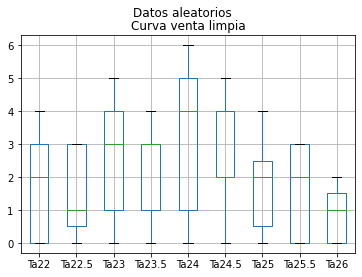

In [42]:
import matplotlib.pyplot as plt
#df.boxplot(by='tienda', column =columnas, grid = True);
plt.suptitle('Datos aleatorios')
plt.title('Curva venta limpia')

df.boxplot(column =columnas, grid = True);

In [ ]:
tallas=pd.melt(df[columnas])

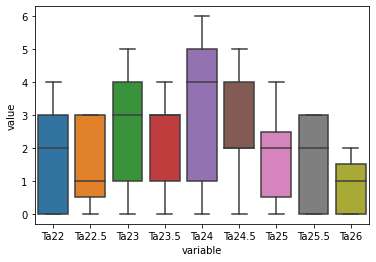

In [63]:
import seaborn as sns
sns.boxplot(x="variable", y="value",data=tallas);